In [1]:
import numpy as np

from utils.loadData import loadData, loadDataWithNews
from lstm.preprocessing import dataToTimeSeriesMultiDimensional, getDatasetsMultiDimensionalBaseline, normalizeAtOnce, dataToTimeSeries
from lstm.model import getModelBaseline, evaluateModelQuick, evaluateFinal, evaluateFinalBaseline
from lstm.visualization import visualize_loss, show_batch, show_data_simple, showRegressionExampleMultiDimensional, showRegressionExample
from lstm.callbacks import es_callback, modelckpt_callback
from keras.utils.vis_utils import plot_model

In [2]:
df = loadDataWithNews()

In [3]:
features = np.array(df["Close"]).reshape(-1, 1)
normalized_data, scaler = normalizeAtOnce(features)

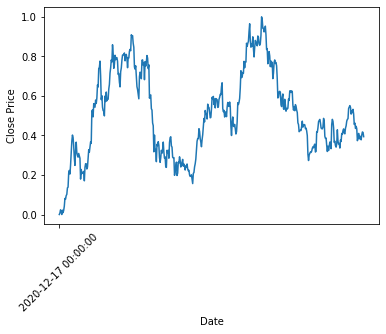

In [4]:
normalized_data, scaler = normalizeAtOnce(features)
show_data_simple(normalized_data[:, 0], df["Date"])

In [5]:
config = {
    "past": 10,
    "future": 10,
    "neurons": 50,
    "batch_size": 64,
    "epochs": 300,
    "features": 10
}

x_train = normalized_data[:-1]
y_train = normalized_data[1:]
x_train, y_train = dataToTimeSeries(x_train, y_train, config["past"], config["future"])

# Split train/val/test 80/10/10
split = int(x_train.shape[0]*0.9)
x_test = x_train[split:]
y_test = y_train[split:]

x_train = x_train[:split]
y_train = y_train[:split]

print(x_train.shape, y_train.shape)

(419, 10) (419, 10)


In [6]:
model = getModelBaseline(config)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


2022-06-08 14:31:48.333434: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


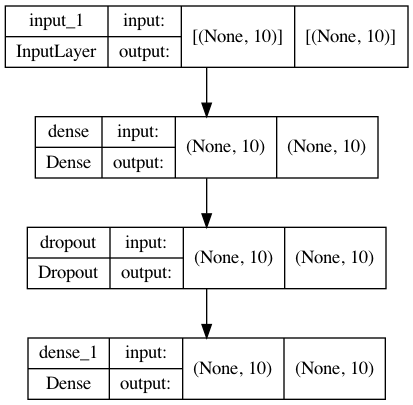

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/300
12/12 [==============================] - 1s 37ms/step - loss: 1.8024 - rmse: 1.3425 - mae: 1.0032 - mape: 25672.9336 - val_loss: 0.6356 - val_rmse: 0.7973 - val_mae: 0.6348 - val_mape: 158.3586
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 1.4075 - rmse: 1.1864 - mae: 0.8696 - mape: 19554.1387 - val_loss: 0.4688 - val_rmse: 0.6847 - val_mae: 0.5274 - val_mape: 131.3389
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 1.0700 - rmse: 1.0344 - mae: 0.7540 - mape: 71538.2891 - val_loss: 0.3506 - val_rmse: 0.5921 - val_mae: 0.4402 - val_mape: 109.4319
Epoch 4/300
12/12 [==============================] - 0s 5ms/step - loss: 0.8490 - rmse: 0.9214 - mae: 0.6616 - mape: 66519.3125 - val_loss: 0.2620 - val_rmse: 0.5119 - val_mae: 0.3691 - val_mape: 91.6689
Epoch 5/300
12/12 [==============================] - 0s 10ms/step - loss: 0.6675 - rmse: 0.8170 - mae: 0.5845 - mape: 94987.4453 - val_loss: 0.1974 - val_rmse: 0.4443 - val_mae: 0.

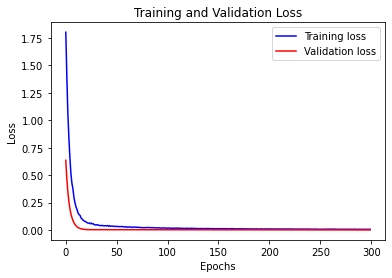

In [8]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=config["epochs"],
    validation_split=0.1,
    # callbacks=[es_callback, modelckpt_callback],
)
visualize_loss(history)

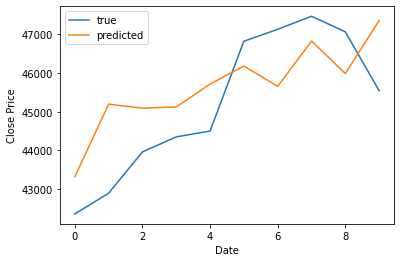

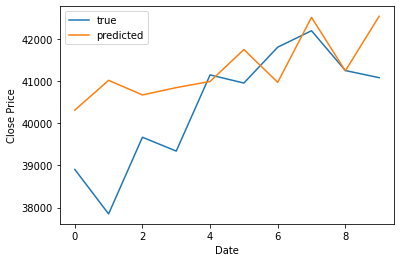

In [9]:
showRegressionExample(x_test[-10], y_test[-10], model, scaler)
showRegressionExample(x_test[-20], y_test[-20], model, scaler)